In [ ]:
#This dataset consists of 247950 instances, of which 128541 are from phishing URLs and 119409 are from legitimate URLs.
# It encompasses 41 features and 1 target variable (0=legitimate,1=phishing), making it suitable for implementing
# machine learning algorithms to identify phishing attacks. 

import pandas as pd

df = pd.read_csv('Dataset.csv')  
print(df.head())
print(df.shape)
print(df.dtypes)


   Type  url_length  number_of_dots_in_url  having_repeated_digits_in_url  \
0     0          37                      2                              0   
1     1          70                      5                              0   
2     0          42                      2                              0   
3     0          46                      2                              0   
4     0          51                      3                              0   

   number_of_digits_in_url  number_of_special_char_in_url  \
0                        0                              8   
1                        0                             12   
2                        6                              8   
3                        0                              7   
4                        0                              9   

   number_of_hyphens_in_url  number_of_underline_in_url  \
0                         0                           0   
1                         0                         

In [4]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split


In [6]:
# Separate features and target
X = df.drop('Type', axis=1)
y = df['Type']


In [7]:
#scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Optional: convert back to DataFrame for readability
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

print(X_scaled_df.head())


   url_length  number_of_dots_in_url  having_repeated_digits_in_url  \
0   -0.717571              -0.528736                      -0.440247   
1    0.391130               1.245397                      -0.440247   
2   -0.549586              -0.528736                      -0.440247   
3   -0.415198              -0.528736                      -0.440247   
4   -0.247213               0.062641                      -0.440247   

   number_of_digits_in_url  number_of_special_char_in_url  \
0                -0.455795                      -0.488138   
1                -0.455795                       0.359612   
2                 0.170574                      -0.488138   
3                -0.455795                      -0.700076   
4                -0.455795                      -0.276201   

   number_of_hyphens_in_url  number_of_underline_in_url  \
0                 -0.486297                    -0.31224   
1                 -0.486297                    -0.31224   
2                 -0.486297  

In [8]:
#checking balace-will perform smot analysis if needed
print(y.value_counts())


Type
0    128541
1    119409
Name: count, dtype: int64


In [ ]:
#hence, imbalanced- smot analysis to balance 
#this is optional
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_balanced, y_balanced = smote.fit_resample(X_scaled_df, y)

print(pd.Series(y_balanced).value_counts())


Type
0    128541
1    128541
Name: count, dtype: int64


In [11]:
#apply PCA
from sklearn.decomposition import PCA
import numpy as np

# Initialize PCA
pca = PCA(n_components=2)  # Change components based on your analysis
X_pca = pca.fit_transform(X_scaled_df)

# Create a DataFrame with PCA components
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['Type'] = y.values  # Attach target for plotting

# Explained Variance Ratio
print("Explained Variance Ratio:", pca.explained_variance_ratio_)


Explained Variance Ratio: [0.21859547 0.10470525]


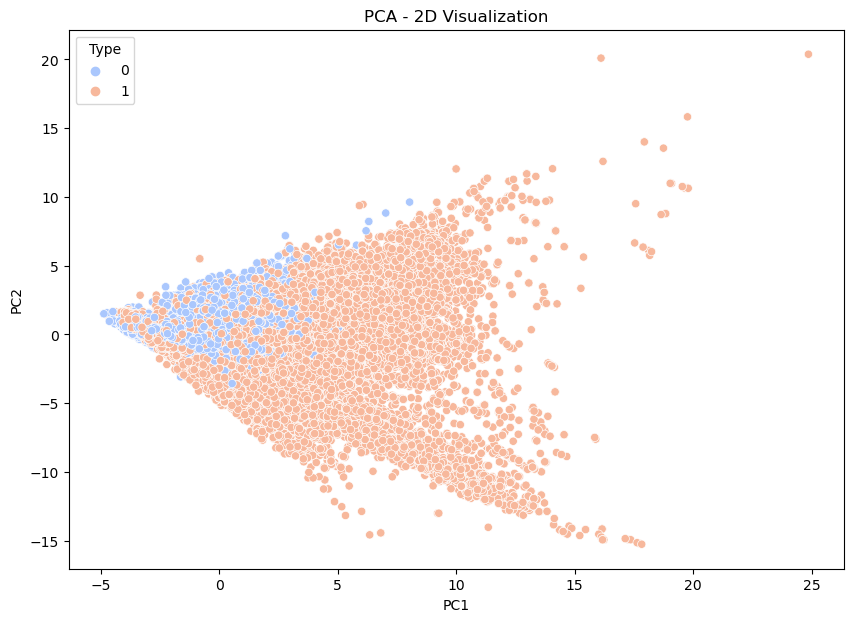

In [12]:
#plotting results
plt.figure(figsize=(10, 7))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Type', palette='coolwarm')
plt.title('PCA - 2D Visualization')
plt.show()
